# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Alicia Rene Jacobs

## What does a Simple Linear Regression Model do?

#### A simple linear regression model uses an equation to predict a dependent variable (unknow value) based on only one independent variable (known value). 

In [1]:
#import modules
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#load the diamonds dataset fom Seaborn
data = sns.load_dataset('diamonds') 

In [3]:
#display the first five rows
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* The r-value measures the type and strength of the linear correlation between two variables
* The r-value will always have a value between 1.0 and -1.0
* When the r-value is between 0.01 and 1.0 there is a positive correlation
* When the r-value is between -0.01 and -1.0 there is a negative correlation
* When the r-value is 0.00 there is no correlation

In [4]:
#Use Pandas corr() method and display the first 7 rows
#the head(7) was not needed to display the first 7 rows as there are 7 columns but I used it anyway
data.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

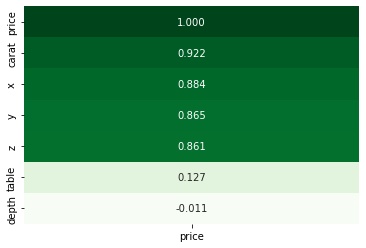

In [5]:
#display sorted condensed heatmap for price, with annotation valuse to 3 decimal places. remove the color bar
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='Greens',cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model

1. Split the dataset
2. Create model from training dataset
3. Validate model with test dataset
4. If the model is valid, predict data with it

In [6]:
#linear regression analysis inmorts
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
#split the data 
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']], 
    test_size=0.30, random_state=20)

In [8]:
#create the model from the training dataset and print it
model = LinearRegression()
model

LinearRegression()

In [9]:
#fit the training dataset to the model
model.fit(x_train, y_train)

LinearRegression()

In [10]:
#Score the model
model.score(x_test, y_test)

0.8504107786474794

In [11]:
#Use the model to predict the y values based on the x values in the
#test dataset. Assign the results in a variable and display the variable
y_predicted = model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [12]:
#add the predicted values in a new DataFrame with its single column 
#named predicted_price, display the first three throws
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])
predicted.head(3)

,price_predicted
0,9540.641914
1,1940.075433
2,3180.984246


In [13]:
#Join the y_test and predicted data with the x_test data and save the joined data in a new DataFrame
#display the first five rows 
combined = predicted.join([y_test.reset_index(drop=True),
                           x_test.reset_index(drop=True)])
combined.head()

,price_predicted,price,carat
0,9540.641914,8674,1.52
1,1940.075433,1637,0.54
2,3180.984246,2657,0.70
3,2327.859437,1838,0.59
4,4421.893059,2980,0.86


In [14]:
# melt price and price_predicted columns into a single column
melted = pd.melt(combined, id_vars=['carat'], 
                 value_vars=['price','price_predicted'], 
                 var_name='price_type', value_name='price_value')

melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,price_predicted,156.269013
32360,1.01,price_predicted,5585.245072
32361,1.53,price_predicted,9618.198715
32362,0.23,price_predicted,-464.185393


<AxesSubplot:xlabel='carat', ylabel='price_value'>

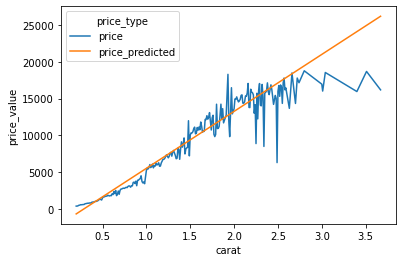

In [15]:
#Use a Seaborn line plot without a confidence interval to plot the predicted data
sns.lineplot(data=melted, x='carat', y='price_value', 
            hue='price_type', ci=None)

## Regression line equation is y = mx + b, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [16]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [17]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [18]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454457


In [19]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800454457


In [20]:
predict1 = (m * 0.70) + b
print(f'The predicted price for a 0.70 carat diamond is ${predict1[0]:,.2f}')

The predicted price for a 0.70 carat diamond is $3,173.14


In [21]:
predict2 = (m * 0.54) + b
print(f'The predicted price for a 0.54 carat diamond is ${predict2[0]:,.2f}')

The predicted price for a 0.54 carat diamond is $1,932.11


In [22]:
melted.query('carat == 0.70')

,carat,price_type,price_value
2,0.7,price,2657.000000
17,0.7,price,2268.000000
30,0.7,price,2415.000000
31,0.7,price,2048.000000
74,0.7,price,2478.000000
...,...,...,...
32266,0.7,price_predicted,3180.984246
32267,0.7,price_predicted,3180.984246
32320,0.7,price_predicted,3180.984246
32322,0.7,price_predicted,3180.984246


In [23]:
melted.query('carat == 0.54')

,carat,price_type,price_value
1,0.54,price,1637.000000
121,0.54,price,2671.000000
160,0.54,price,1944.000000
181,0.54,price,1763.000000
242,0.54,price,2776.000000
...,...,...,...
31776,0.54,price_predicted,1940.075433
31800,0.54,price_predicted,1940.075433
31902,0.54,price_predicted,1940.075433
32309,0.54,price_predicted,1940.075433


### Yes the results are close. The .7 carret predicted price from step 18 was 3180.99 and the 0.54 was 1940.08